In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [3]:
X, y = datasets.load_boston(return_X_y=True)

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
        'B', 'LSTAT']

df = pd.DataFrame(X, columns = names)
df['MEDV'] = y

In [4]:
df.shape

(506, 14)

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
pd.set_option('precision', 4)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


In [8]:
#Shows the amount of correlation coefficients above or below .7 and -.7 for each variable
#This is useful for focusing attention to specific areas in the following correlation coefficient matrix

big_pos = df.corr(method = 'pearson') >= .7
big_neg = df.corr(method = 'pearson') <= -.7
big_pos = big_pos.sum() - 1                 #remove one because every variable has itself in the matrix for a correlation coeffiction of 1
big_neg = big_neg.sum()
big_corrs = big_pos + big_neg
big_corrs

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        3
RM         0
AGE        2
DIS        3
RAD        1
TAX        2
PTRATIO    0
B          0
LSTAT      1
MEDV       1
dtype: int64

In [9]:
df.corr(method = 'pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


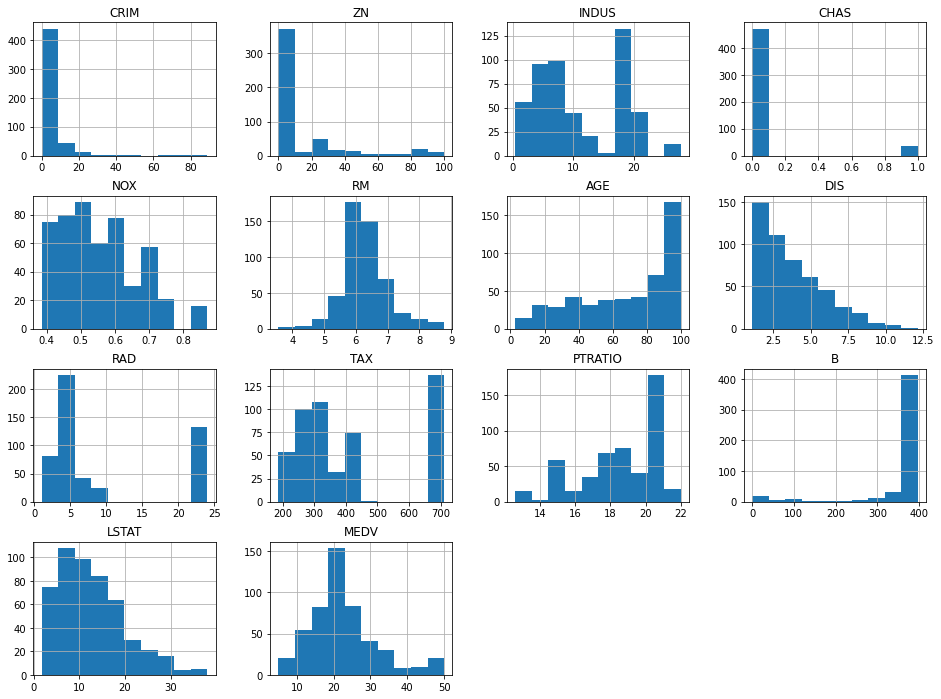

In [10]:
df.hist(figsize = (16,12))
plt.show()

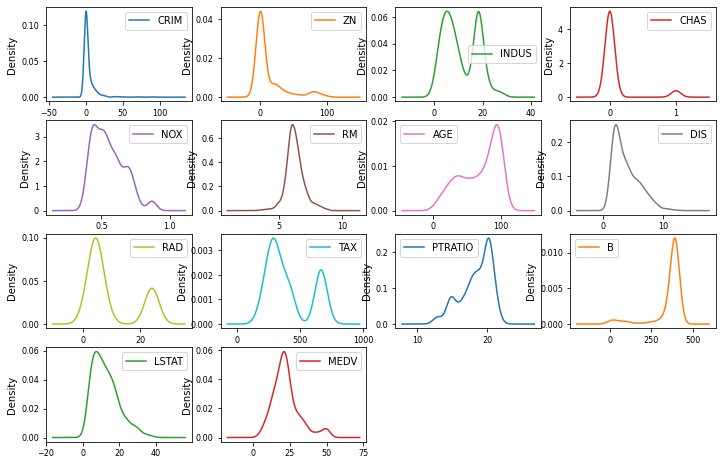

In [23]:
df.plot(kind = 'density', subplots = True, layout = (4,4), legend = True, fontsize = 8, figsize = (12,8), sharex = False)
plt.show()

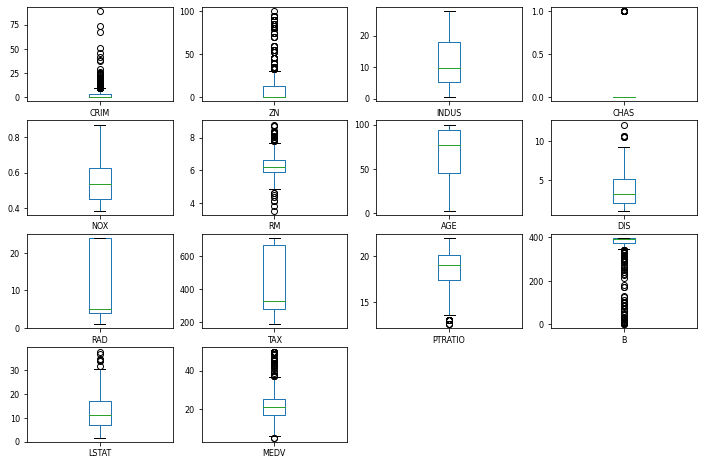

In [26]:
df.plot(kind='box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 8, figsize = (12,8), legend = True)
plt.show()

In [37]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [35]:
np.arange(0,14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

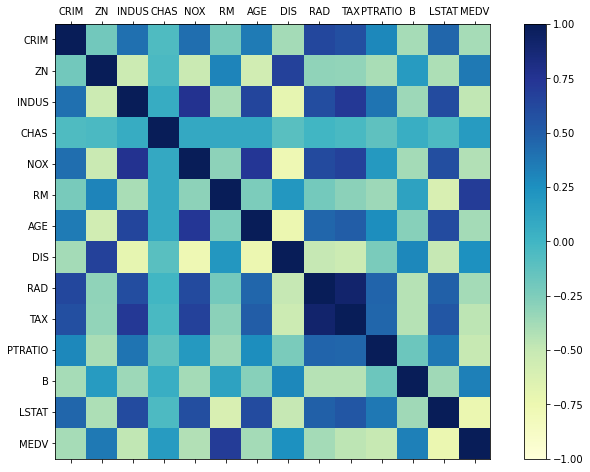

In [39]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(method = 'pearson'), vmin = -1, vmax = 1, interpolation = 'none', cmap = 'YlGnBu')
fig.colorbar(cax)
ticks = np.arange(0,14)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [43]:
values = np.array(df.values)
X = values[:, 0:13]
y = values[:, 13]
test_size = .3
seeds = list(range(0,10))

In [47]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [48]:
all_results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    results = []
    names = []
    
    for name, model, in models:
        cv_results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
    
    all_results.append(results)

In [51]:
#Organize the results into separate lists for each model

lr_results = []
lasso_results = []
en_results = []
knn_results = []
dt_results = []
svr_results = []

master_results = [lr_results, lasso_results, en_results, knn_results, dt_results, svr_results]

for results in all_results:
    for idx, result in enumerate(results):
        if idx == 0:
            lr_results.append(result)
        if idx == 1:
            lasso_results.append(result)
        if idx == 2:
            en_results.append(result)
        if idx == 3:
            knn_results.append(result)
        if idx == 4:
            dt_results.append(result)
        if idx == 5:
            svr_results.append(result)

In [52]:
#Collapses the results for each model into a single array so summary statistics can be performed

for idx, results in enumerate(master_results):
    results = np.stack(results)
    mean = results.mean()
    std = results.std()
    name = names[idx]
    msg = "{}: {} ({})"
    print(msg.format(name, round(mean, ndigits = 4), round(std, ndigits = 4)))

LR: -23.8796 (11.5514)
Lasso: -28.3373 (11.5358)
EN: -27.5496 (11.2421)
KNN: -43.3322 (16.511)
DT: -23.9242 (15.3986)
SVR: -66.6963 (27.5296)


In [53]:
#Creates an array of the results suitable for plotting into a box and whisker plot

plot_results = np.array([])
for idx, results in enumerate(master_results):
    results = np.stack(results)
    plot_results = np.append(plot_results, results)
plot_results = np.split(plot_results, 6)

In [54]:
#Creates a dataframe of the results suitable for descriptive statistics

df_results = pd.DataFrame()

for idx, col in enumerate(plot_results):
    df_results[idx] = col

df_results.columns = names

In [55]:
df_results.describe()

,LR,Lasso,EN,KNN,DT,SVR
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,-23.8796,-28.3373,-27.5496,-43.3322,-23.9242,-66.6963
std,11.6096,11.5939,11.2988,16.5941,15.4762,27.6683
min,-87.0795,-79.9738,-78.2031,-115.2018,-87.2654,-163.8563
25%,-28.1619,-33.5744,-32.7891,-47.9024,-29.5494,-83.1015
50%,-20.4244,-27.6383,-26.2482,-41.2085,-18.1993,-64.8080
75%,-16.9852,-19.9715,-19.5374,-32.8911,-13.9053,-45.0090
max,-8.8458,-10.5034,-10.4142,-20.0630,-6.0706,-21.0511


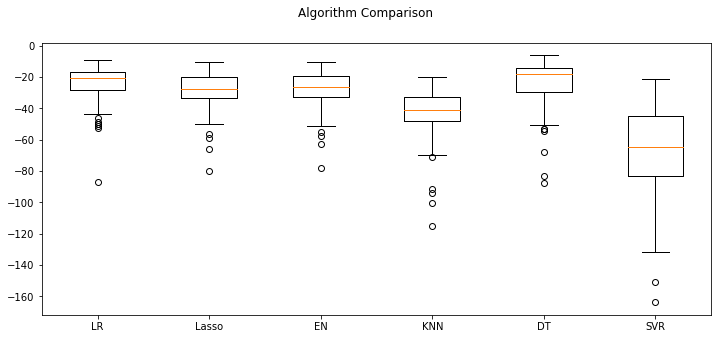

In [56]:
fig = plt.figure(figsize = (12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(plot_results)
ax.set_xticklabels(names)
plt.show()

In [59]:
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('Lasso', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()), ('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

In [60]:
all_results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    results = []
    names = []
    
    for name, model, in pipelines:
        cv_results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
    
    all_results.append(results)

In [61]:
#Organize the results into separate lists for each model

lr_results = []
lasso_results = []
en_results = []
knn_results = []
dt_results = []
svr_results = []

master_results = [lr_results, lasso_results, en_results, knn_results, dt_results, svr_results]

for results in all_results:
    for idx, result in enumerate(results):
        if idx == 0:
            lr_results.append(result)
        if idx == 1:
            lasso_results.append(result)
        if idx == 2:
            en_results.append(result)
        if idx == 3:
            knn_results.append(result)
        if idx == 4:
            dt_results.append(result)
        if idx == 5:
            svr_results.append(result)

In [62]:
#Collapses the results for each model into a single array so summary statistics can be performed

for idx, results in enumerate(master_results):
    results = np.stack(results)
    mean = results.mean()
    std = results.std()
    name = names[idx]
    msg = "{}: {} ({})"
    print(msg.format(name, round(mean, ndigits = 4), round(std, ndigits = 4)))

ScaledLR: -23.8796 (11.5514)
ScaledLasso: -28.8733 (13.1673)
ScaledEN: -30.3165 (14.6206)
ScaledKNN: -23.2159 (14.4643)
ScaledDT: -25.2896 (14.8993)
ScaledSVR: -32.4358 (17.4395)


In [63]:
#Creates an array of the results suitable for plotting into a box and whisker plot

plot_results = np.array([])
for idx, results in enumerate(master_results):
    results = np.stack(results)
    plot_results = np.append(plot_results, results)
plot_results = np.split(plot_results, 6)

In [64]:
#Creates a dataframe of the results suitable for descriptive statistics

df_results = pd.DataFrame()

for idx, col in enumerate(plot_results):
    df_results[idx] = col

df_results.columns = names

In [65]:
df_results.describe()

,ScaledLR,ScaledLasso,ScaledEN,ScaledKNN,ScaledDT,ScaledSVR
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,-23.8796,-28.8733,-30.3165,-23.2159,-25.2896,-32.4358
std,11.6096,13.2336,14.6942,14.5372,14.9744,17.5274
min,-87.0795,-92.7119,-102.1213,-88.8508,-89.5074,-114.6016
25%,-28.1619,-34.5724,-36.8072,-28.1611,-34.1896,-44.6473
50%,-20.4244,-26.4251,-28.5038,-20.3167,-19.4396,-29.8259
75%,-16.9852,-19.4842,-19.5862,-13.2665,-13.8324,-18.9571
max,-8.8458,-11.5454,-11.8197,-6.7060,-7.7151,-8.1381


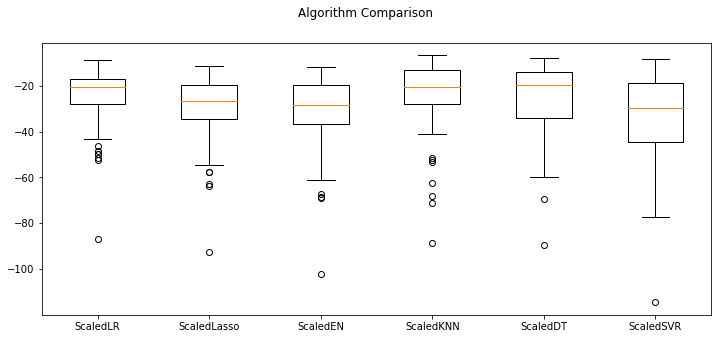

In [66]:
fig = plt.figure(figsize = (12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(plot_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
all_results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    results = []
    names = []
    
    for name, model, in models:
        cv_results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
    
    all_results.append(results)

In [100]:
best_results = []
best_params = []

for seed in seeds:

    k_values = list(range(1,15))
    param_grid = dict(n_neighbors = k_values)
    model = KNeighborsRegressor()
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)
    grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = kf)
    grid_result = grid.fit(rescaledX, y_train)
    best_results.append(grid_result.best_score_)
    best_params.append(grid_result.best_params_)

In [118]:
df_best = pd.DataFrame(data = [best_params, best_results])
df_best = df_best.transpose()
df_best.columns = ['params', 'scores']
df_best

,params,scores
0,{'n_neighbors': 3},-20.01
1,{'n_neighbors': 3},-23.7
2,{'n_neighbors': 3},-21.03
3,{'n_neighbors': 2},-20.6
4,{'n_neighbors': 3},-20.65
5,{'n_neighbors': 11},-20.51
6,{'n_neighbors': 2},-16.09
7,{'n_neighbors': 3},-20.95
8,{'n_neighbors': 2},-22.25
9,{'n_neighbors': 2},-24


In [129]:
model = KNeighborsRegressor(n_neighbors = 3)
results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    scaler_train = StandardScaler().fit(X_train)
    rescaledX_train = scaler.transform(X_train)
    scaler_test = StandardScaler().fit(X_test)
    rescaledX_test = scaler.transform(X_test)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    model.fit(rescaledX_train, y_train)
    predictions = model.predict(rescaledX_test)
    mse = mean_squared_error(y_test, predictions)
    print(mse)
    results.append(mse)
    
results = np.array(results)
print('\n')
print("KNN Average MSE")
results.mean()

27.239597953216364
15.800928362573096
22.937807017543854
25.08812865497076
22.04344298245614
26.970175438596495
37.96676169590643
25.252156432748535
20.22347953216374
15.239904970760234


KNN Average MSE


23.87623830409356

In [128]:
model = LinearRegression()
results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    scaler_train = StandardScaler().fit(X_train)
    rescaledX_train = scaler.transform(X_train)
    scaler_test = StandardScaler().fit(X_test)
    rescaledX_test = scaler.transform(X_test)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    model.fit(rescaledX_train, y_train)
    predictions = model.predict(rescaledX_test)
    mse = mean_squared_error(y_test, predictions)
    print(mse)
    results.append(mse)
results = np.array(results)
print('\n')
print('LR Average MSE')
results.mean()

27.195965766883177
19.831323672063142
23.038812866283532
22.431936070737535
30.05399330712417
30.697037704088583
28.32786925256163
25.76787949083666
23.716180926283545
19.295749073363375


LR Average MSE


25.035674813022535